In [1]:
import matplotlib.pyplot as plt
import numpy as np
import argparse
import time
import cv2
import os

In [103]:
labelsPath = "obj.names"
LABELS = open(labelsPath).read().strip().split("\n")

np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
	dtype="uint8")

weightsPath = "weights/yolov4-obj_best.weights"
configPath = "models/yolov4-obj.cfg"
imagePath = "data/validation"

In [104]:
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

[INFO] loading YOLO from disk...


In [106]:
n = 25
images_periods = dict()
images = dict()
for f in os.listdir(imagePath):
    if not '.jpg' in f:
        continue
    image_path = os.path.join(imagePath, f)
    image_name = image_path.split('/')[-1]
    images_periods.setdefault(image_name, [])
    image = cv2.imread(image_path)
    images[image_name] = image
    images_periods.setdefault(image_name, [])

In [107]:
# images = [(i[0],i[1]) for i in sorted(images.items(), key=lambda x: x[1].shape[0]*x[1].shape[1])]
# images = [(i[0],i[1]) for i in sorted(images.items(), key=lambda x: x[0])]
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416))
net.setInput(blob)
layerOutputs = net.forward(ln)

start = time.time()
for image_name, image in images.items():
	startImage = time.time()

	# load our input image and grab its spatial dimensions
	(H, W) = image.shape[:2]

	# construct a blob from the input image and then perform a forward
	# pass of the YOLO object detector, giving us our bounding boxes and
	# associated probabilities
	# blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),
	# 	swapRB=True, crop=False)
	blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416))
	net.setInput(blob)
	for i in range(n):
		startForward = time.time()
		layerOutputs = net.forward(ln)
		endForward = time.time()

		# show timing information on YOLO
		period = endForward - startForward
		images_periods[image_name].append(period*1000)
	endImage = time.time()	
	total = endImage - startImage
	m =sum(images_periods[image_name])/len(images_periods[image_name])
	print(f'{image_name} - avg: {m:.2f}ms - total: {total:.2f} segundos')
end = time.time()
total = end - start
print(f'{n} vezes cada imagem - total: {total:.2f} segundos')



0cda1863ee21cd0e.jpg - avg: 398.79ms - total: 9.98 segundos
9a8637fb33ba2e11.jpg - avg: 398.96ms - total: 9.98 segundos
fa748ef4fa55ee54.jpg - avg: 398.76ms - total: 9.98 segundos
8929c86d5aecf832.jpg - avg: 398.73ms - total: 9.98 segundos
8e72808537176248.jpg - avg: 399.09ms - total: 9.99 segundos
bbe07c3a618b3a5a.jpg - avg: 399.01ms - total: 9.98 segundos
9ea4706b69ca4217.jpg - avg: 398.99ms - total: 9.98 segundos
81be0b735c57cb7e.jpg - avg: 398.89ms - total: 9.98 segundos
b292c1fb4197276a.jpg - avg: 398.88ms - total: 9.98 segundos
3f8b2a35be3341ae.jpg - avg: 399.01ms - total: 9.98 segundos
66ebca32add046cf.jpg - avg: 398.96ms - total: 9.98 segundos
6a4747066ffd113f.jpg - avg: 398.95ms - total: 9.98 segundos
25 vezes cada imagem - total: 119.78 segundos


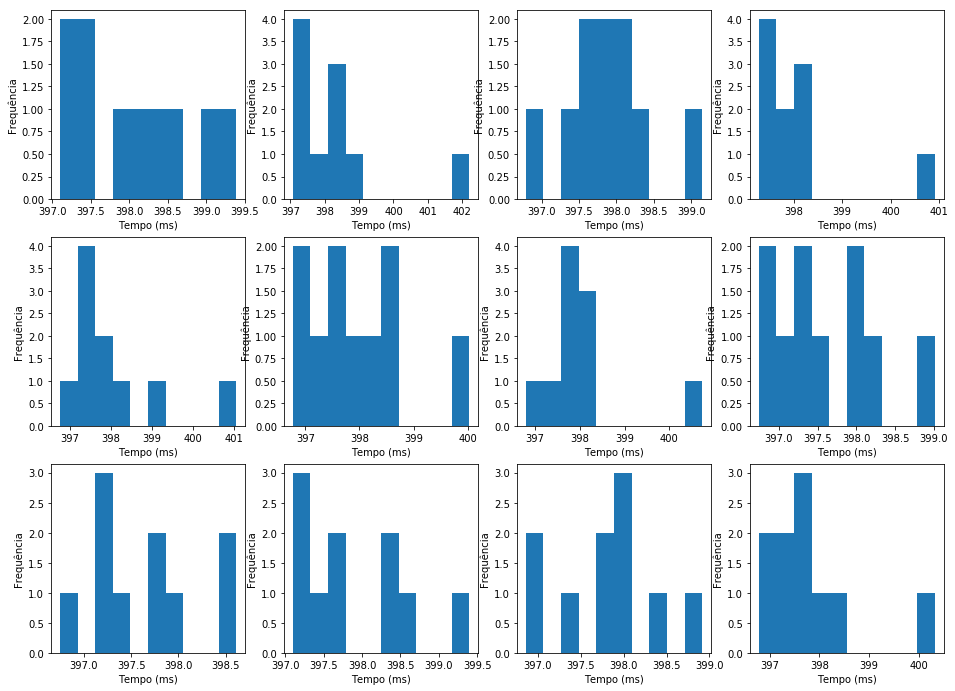

In [94]:
plt.figure(figsize=(16, 16))
i = 1
cm = plt.cm.get_cmap('RdYlGn_r')

for image, periods in images_periods.items():
    m = 1000*sum(periods)/len(periods)
    plt.subplot(4,4, i)
    n, bins, patches = plt.hist(periods,10, label=image)
    plt.xlabel('Tempo (ms)')
    plt.ylabel('Frequência')
    i+=1
plt.show()